In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:50000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/epoch/model.ckpt-30.00-24600'
work_dir = '/home/gezi/new/temp/image-caption/ai-challenger/ensemble/20171126.mil/'
model_dir = work_dir + 'model'
vocab_path = '/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'

text2ids.init(vocab_path)
vocab = text2ids.vocab

from libgbdt import GbdtPredictor, Vector
predictor = GbdtPredictor(model_dir)

tensorflow_version: 1.4.0


INFO:tensorflow:Initializing vocabulary from file: /home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


ENCODE_UNK 1


In [4]:
# case_file = '/home/gezi/mine/mount/temp/image-caption/ai-challenger/model.v5/case.txt'
# for line in open(case_file):
#   image_name = line.strip().split()[0]
#   if not image_name.endswith('.jpg'):
#     image_name += '.jpg'
#   image_path = os.path.join(image_dir, image_name)

#   IMAGE_SIZE = (14, 10)
#   #plt.subplot(1, 1, 1)  
#   plt.figure(figsize=IMAGE_SIZE)
#   image_show(image_path)

#   if not os.path.exists(image_path):
#     print('path not exists:%s'%image_path)
#     image_path = image_name
#     if not os.path.exists(image_path):
#       continue
#   image = melt.read_image(image_path)

#   scores, word_ids = predictor.top_words([image], 200)
#   scores = scores[0]
#   word_ids = word_ids[0]
#   print('topwords of image ', image_name)
#   i = 0
#   for word_id, score in zip(word_ids, scores):
#     print(i, vocab.key(int(word_id)), score, end='|')
#     i += 1  

In [5]:
m = {}
feature_file =  work_dir + 'ensemble.train.final.txt'
for line in open(feature_file):
  l = line.split('\t')
  img = l[0]
  m.setdefault(img, {})
  caption = l[1]
  label = l[2]
  fe = '\t'.join(l[3:])
  fe = Vector(fe)
  m[img][caption] = fe

image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ee46f3ffbed4869a9cc3f24423b5bbb2ca180a9c
ee46f3ffbed4869a9cc3f24423b5bbb2ca180a9c.jpg not in dict


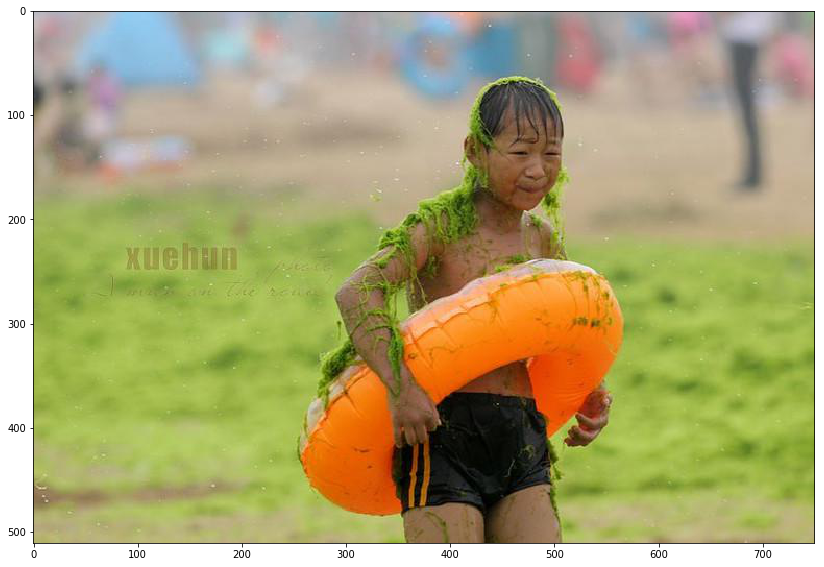

text(q for exit): 一个双手抱着游泳圈的男人走在浑浊的水里


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.314 seconds.
Prefix dict has been built succesfully.


一个 双手 抱 着 游泳圈 的 男人 走 在 浑浊 的 水里
0.888120489574
f0:final_ensemble_score:46.0163:0.0877426
f2:mil_score:-33.5837:0.225
f37:detect_man:-8.10559:0.124389
f33:caption_man:5.66539:1
f4:caption_len:-3.71925:19
f38:detect_woman:-2.21806:0.292736
f7:caption_mean_idf:-1.59017:2.25959
f1:ori_ensemble_score:1.26217:0.0652426
f40:detect_girl:-0.831279:0.151597
f31:detect_hat_score:-0.611441:0
f5:caption_words:-0.607157:12
f34:caption_woman:-0.250338:0
f32:detect_hat_pos:-0.15499:1000
f6:caption_total_idf:-0.147953:27.1151
f41:scene_logit:-0.0685793:0
f39:detect_boy:-0.0472053:0.0231875
f9:caption_dup_ratio:0.0156089:1
f8:caption_dup_count:0.0120682:0
text(q for exit): 泥潭 里 走 着 一个 双手 抱 着 皮球 的 孩子
泥潭 里 走 着 一个 双手 抱 着 皮球 的 孩子
0.762032311923
f0:final_ensemble_score:31.0329:0.0497337
f32:detect_hat_pos:-8.3713:1000
f34:caption_woman:-8.1731:0
f4:caption_len:-5.48461:16
f33:caption_man:-2.42092:0
f7:caption_mean_idf:-1.54056:2.50674
f31:detect_hat_score:-1.4867:0
f38:detect_woman:-0.936579:0.292736
f5:capti

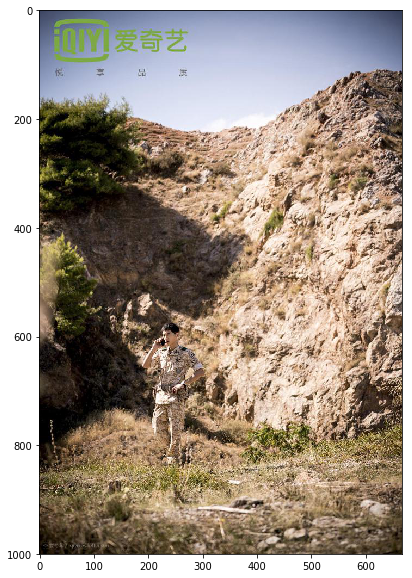

text(q for exit): 一个 戴着 帽子 的 男人 走 在 崎岖 的 山路 上 
一个 戴着 帽子 的 男人 走 在 崎岖 的 山路 上
0.945317732455
f0:final_ensemble_score:50.5307:0.126842
f7:caption_mean_idf:-29.2694:1.93398
f32:detect_hat_pos:-9.5277:1000
f33:caption_man:6.16739:1
f4:caption_len:-3.90095:17
f37:detect_man:-3.4035:0.547896
f39:detect_boy:-2.77653:0.0094718
f31:detect_hat_score:-2.27555:0
f2:mil_score:2.27114:0.399174
f30:has_hat:-2.07889:1
f38:detect_woman:-1.92424:0.000481267
f40:detect_girl:-1.26309:0.000201125
f5:caption_words:-0.863246:11
f41:scene_logit:-0.212011:7.0697
f36:caption_girl:-0.115277:0
f34:caption_woman:-0.0972663:0
f9:caption_dup_ratio:0.0851586:1
f1:ori_ensemble_score:0.0749273:0.0869249
f8:caption_dup_count:0.00331532:0
text(q for exit): q
image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 57d44aeed69f94f00881452a0fec3445dcc3e1b8
57d44aeed69f94f00881452a0fec3445dcc3e1b8.jpg not in dict


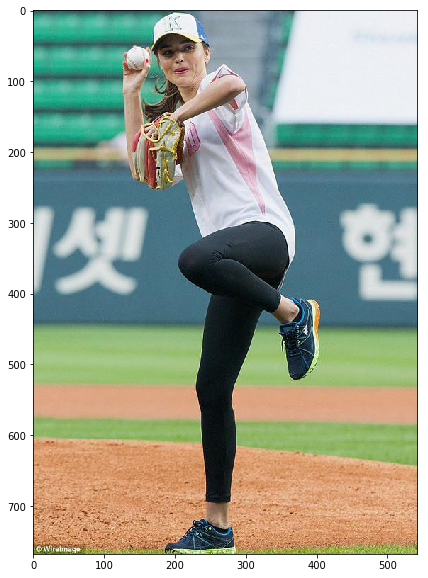

KeyboardInterrupt: 

In [6]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
    
  if image_name not in m:
    print('%s not in dict' % image_name)
        
  info = m[image_name.strip('.jpg')]

  # Size, in inches, of the output images.
  IMAGE_SIZE = (14, 10)
  #plt.subplot(1, 1, 1)  
  plt.figure(figsize=IMAGE_SIZE)
  image_show(image_path)

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    text = text.replace(' ', '')
    print(text2ids.text2segtext(text))
    if text not in info:
       print('%s not in dict' % text)
    fe = info[text]
    print(predictor.Predict(fe))
    print('\n'.join(predictor.SortedGainStrVec(fe, topNum=20)))

In [ ]:
print(info.items)

In [ ]:
print(info.items()[0][0])